In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def take_integral(f, a, b, N=50, visual=False):
    x = np.linspace(a, b, N + 1)
    y = f(x)
    y_right = y[1:]
    y_left = y[:-1]
    dx = (b - a) / N
    integral = dx * np.sum(y_right + y_left) / 2

    if visual:
        plt.title("f(x)")
        plt.plot(x, f(x))
        for i in range(N):
            xs = [x[i], x[i], x[i + 1], x[i + 1]]
            ys = [0, f(x[i]), f(x[i + 1]), 0]
            plt.fill(xs, ys, "b", edgecolor="b", alpha=0.2)
        plt.show()
    return integral

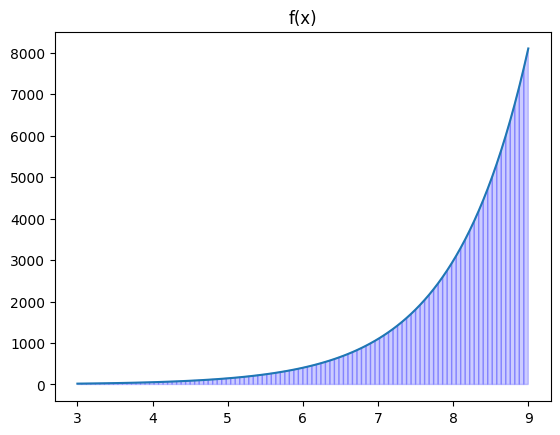

analitic_integral - my_integral = 2.4247540356927857 


In [3]:
A, B = 3, 9
N = 100
my_integral = take_integral(np.exp, 3, 9, N, True)

analitic_integral = np.exp(B) - np.exp(A)
error = np.abs(analitic_integral - my_integral)
print(f"analitic_integral - my_integral = {error} ")

In [4]:
%%writefile task2.py
from mpi4py import MPI
from numpy import pi, exp, fft
import numpy as np
import time as  timer
import sys
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()
time0 = timer.time()

A,B,N = np.array(sys.argv[1:4],dtype=int)


intervals = np.linspace(A, B, size + 1)
for i in range(size):
    interval = intervals[rank : rank + 2]

if rank == size -1:
    N = N // size + N % size
else:
    N = N // size

    
# def take_integral(f, interval,N):
#     A,B =interval
#     x = np.linspace(A, B, N + 1)
#     y = f(x)
#     y_right = y[1:]
#     y_left = y[:-1]
#     dx = (B - A) / N
#     integral = dx * np.sum(y_right + y_left) / 2
#     return integral

def take_integral(f, interval,N):
    A,B =interval
    x = np.linspace(A, B, N + 1)
    dx = (B - A) / N 
    y = f(x)
    cum_sum = 0
    for n in range(N):
        cum_sum += y[n+1] + y[n]
    return cum_sum * (dx/2)
        



# print(interval,N)
integral = take_integral(np.exp,interval,N)
integral_list = comm.gather(integral, root=0)

if rank ==0:
    print(sum(integral_list),timer.time()- time0)


MPI.Finalize()

Overwriting task2.py


In [5]:
timers = []
processes = list(range(1,5))
for proc in processes:
    console_log = !mpirun -n {proc} python task2.py 3 9 10000000
    timers.append(float(console_log[0].split(" ")[1]))

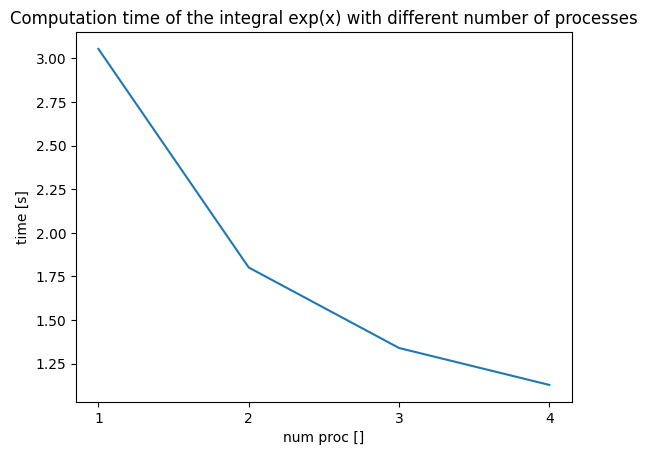

In [6]:
plt.plot(processes, timers)
plt.title("Computation time of the integral exp(x) with different number of processes")
plt.xlabel("num proc []")
plt.ylabel("time [s]")
plt.xticks(processes)
plt.show()

#### Check correctness

In [7]:
console_log = !mpirun -n {proc} python task2.py {A} {B} 10000000
integral = float(console_log[0].split(" ")[0])

In [8]:
error = np.abs(analitic_integral - integral)
print(f"analitic_integral - my_integral = {error} ")

analitic_integral - my_integral = 4.447429091669619e-10 
